# Monitoring change through time using satellite imagery filmstrip plots

* **Products used:** 
[ls8_sr](https://explorer.digitalearth.africa/ls8_sr),
[ls7_sr](https://explorer.digitalearth.africa/ls7_sr),
[ls5_sr](https://explorer.digitalearth.africa/ls5_sr)

## Background

Understanding how natural and human landscapes have changed through time can provide vital information about the health of local ecosystems and development of the built environment. 
For example, data on changes in the distribution of vegetation in the landscape can be used to monitor the impact of deforestation, or track the recovery of forests after habitat restoration or extreme natural events (e.g. bushfires). 
Tracking changes within urban areas can be used to monitor the growth of infrastructure such as ports and transport networks, while data on coastal changes can be vital for predicting and managing the impacts of coastal erosion or the loss of coastal wetlands (e.g. mangroves).

Although these examples of change can be tracked using direct on-the-ground monitoring (e.g. vegetation surveys), it can be extremely challenging and expensive to obtain a comprehensive understanding of these processes at a broader landscape scale. 
For many applications, it can also be extremely useful to obtain a record of the history of a location undergoing change. 
This typically requires historical monitoring data which is unlikely to be available for all but the most intensively monitored locations.

### Digital Earth Africa use case

More than 30 years of satellite imagery from the [NASA/USGS Landsat program](https://www.usgs.gov/land-resources/nli/landsat) is freely available for Africa, making this a powerful resource for monitoring natural and human-driven change across the African continent.
Because these satellites image every location over Africa regularly (approximately once every 16 days), they provide an unparalleled archive of how many of Africa's landscapes have changed through time.

Analysing change from individual satellite images can be made difficult by the presence of clouds, cloud shadow, sunglint over water, and dynamic processes like changing tides along the coastline. 
By combining individual noisy images into cleaner, cloud-free "summary" images that cover a longer time period (e.g. one or multiple years), we can obtain a clear, consistent view of the African environment that can be compared to reveal changes in the landscape over time.


## Description
In this example, Digital Earth Africa Landsat data is extracted for a given time range and location, and combined using the geometric median ("geomedian") statistic to reveal the median or 'typical' appearance of the landscape for a series of time periods (for more information about geomedians, see the [Geomedian composites notebook](../Frequently_used_code/Generating_geomedian_composites.ipynb)).

For coastal applications, the analysis can be customised to select only satellite images obtained during a specific tidal range (e.g. low, average or high tide).

The results for each time period are combined into a 'filmstrip' plot which visualises how the landscape has changed in appearance across time, with a 'change heatmap' panel highlighting potential areas of greatest change:

![Example of filmstrip plot](../Supplementary_data/Change_filmstrips/filmstrip_example.png)

***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 

### Load packages
Import Python packages used for the analysis.

In [1]:
%matplotlib inline

import os
import datacube
from odc.geo.xr import write_cog
from deafrica_tools.app.changefilmstrips import run_filmstrip_app

### Analysis parameters

The following cell sets important required parameters for the analysis:

* `output_name`: A name that will be used to name the output filmstrip plot file
* `time_range`: The date range to analyse (e.g. `time_range = ('1984-01-01', '2019-12-31)`)
* `time_step`: This parameter allows us to choose the length of the time periods we want to compare (e.g. `time_step = {'years': 5}` will generate one filmstrip plot for every five years of data in the dataset; `time_step = {'months': 18}` will generate one plot for each 18 month period etc.
Time periods are counted from the first value given in `time_range`.

Optional parameters:

* `tide_range`: This parameter allows you to generate filmstrip plots based on specific ocean tide conditions.
This can be valuable for analysing change consistently along the coast. 
For example, `tide_range = (0.0, 0.2)` will select only satellite images acquired at the lowest 20% of tides; `tide_range = (0.8, 1.0)` will select images from the highest 20% of tides. 
The default is `tide_range = (0.0, 1.0)` which will select all images regardless of tide.
* `resolution`: The spatial resolution to load data. 
The default is `resolution = (-30, 30)`, which will load data at 30 m pixel resolution. 
Increasing this (e.g. to `resolution = (-100, 100)`) can be useful for loading large spatial extents.
* `max_cloud`: This parameter allows you to exclude satellite images with excessive cloud. 
The default is `0.5`, which will keep all images with less than 50% cloud.
* `ls7_slc_off`: Whether to include data from after the Landsat 7 SLC failure (i.e. SLC-off). 
Defaults to `False`, which removes all Landsat 7 observations after May 31 2003.
Setting this to `True` will result in extra data, but can also introduce horizontal striping in the output filmstrip plots.
* `size_limit`: An optional integer (in square kilometres) specifying the size limit for the data query. Queries larger than this size will receive a warning that he data query is too large (and may therefore result in memory errors).


**If running the notebook for the first time**, keep the default settings below. This will demonstrate how the analysis works and provide meaningful results. 


In [2]:
# Required parameters
output_name = 'example'
time_range = ('2013', '2021')
time_step = {'years': 3}

# Optional parameters
tide_range = (0.0, 1.0)
resolution = (-30, 30)
max_cloud = 0.5
ls7_slc_off = False
size_limit = 100

## Select location and generate filmstrips
Run the following cell to start the analysis. 
This will plot an interactive map that is used to select the area to load satellite data for.

Select the `Draw a rectangle` or `Draw a polygon` tool on the left of the map, and draw a shape around the area you are interested in.

If running this notebook for the first time, **draw a rectangle around West African Cement Company plant** to see an example of change driven by urban development.
You should draw a rectangle similar to the image shown below:

![Area of interest](../Supplementary_data/Change_filmstrips/rectangle_draw.png)

If running this notebook for a new area, zoom and pan around the map until you find an area of interest, then draw a rectangle or polygon as described above.
You will need to check the availability of Landsat data in your chosen area using the [Digital Earth Africa Explorer](https://explorer.digitalearth.africa/products/ls8_sr).

When you are ready, press the green `done` button on the top right of the map. 
This will start loading the data, and then generate a filmstrips plot.

> Depending on the size of the area you select, this step can take **several minutes to complete**.
To keep load times reasonable, select an area **smaller than 10,000 hectares** in size.
When using the rectangle drawing tool, the area in hectares will be displayed to help guide you.
The 10,000 hectare limit can be overuled by supplying the `size_limit` parameter in the `Analysis Parameters` section above.


> Once the analysis reaches the `Generating geomedian composites` step, you can check the status of the data load by clicking the **Dashboard** link under **Client** below.


Map(center=[6.587292, 1.532833], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

Starting analysis...


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /user/victoria@kartoza.com/proxy/8787/status,
Dashboard: /user/victoria@kartoza.com/proxy/8787/status,Workers: 1
Total threads: 7,Total memory: 59.21 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33135,Workers: 1
Dashboard: /user/victoria@kartoza.com/proxy/8787/status,Total threads: 7
Started: Just now,Total memory: 59.21 GiB
Comm: tcp://127.0.0.1:39651,Total threads: 7
Dashboard: /user/victoria@kartoza.com/proxy/34817/status,Memory: 59.21 GiB
Nanny: tcp://127.0.0.1:34869,


Using pixel quality parameters for USGS Collection 2
Finding datasets
    ls5_sr
    ls7_sr
    Ignoring SLC-off observations for ls7
    ls8_sr
Counting good quality pixels for each time step
Filtering to 108 out of 312 time steps with at least 50.0% good quality pixels
Applying pixel quality/cloud mask
Re-scaling Landsat C2 data
Returning 108 time steps as a dask array

Generating geomedian composites and plotting filmstrips... (click the Dashboard link above for status)


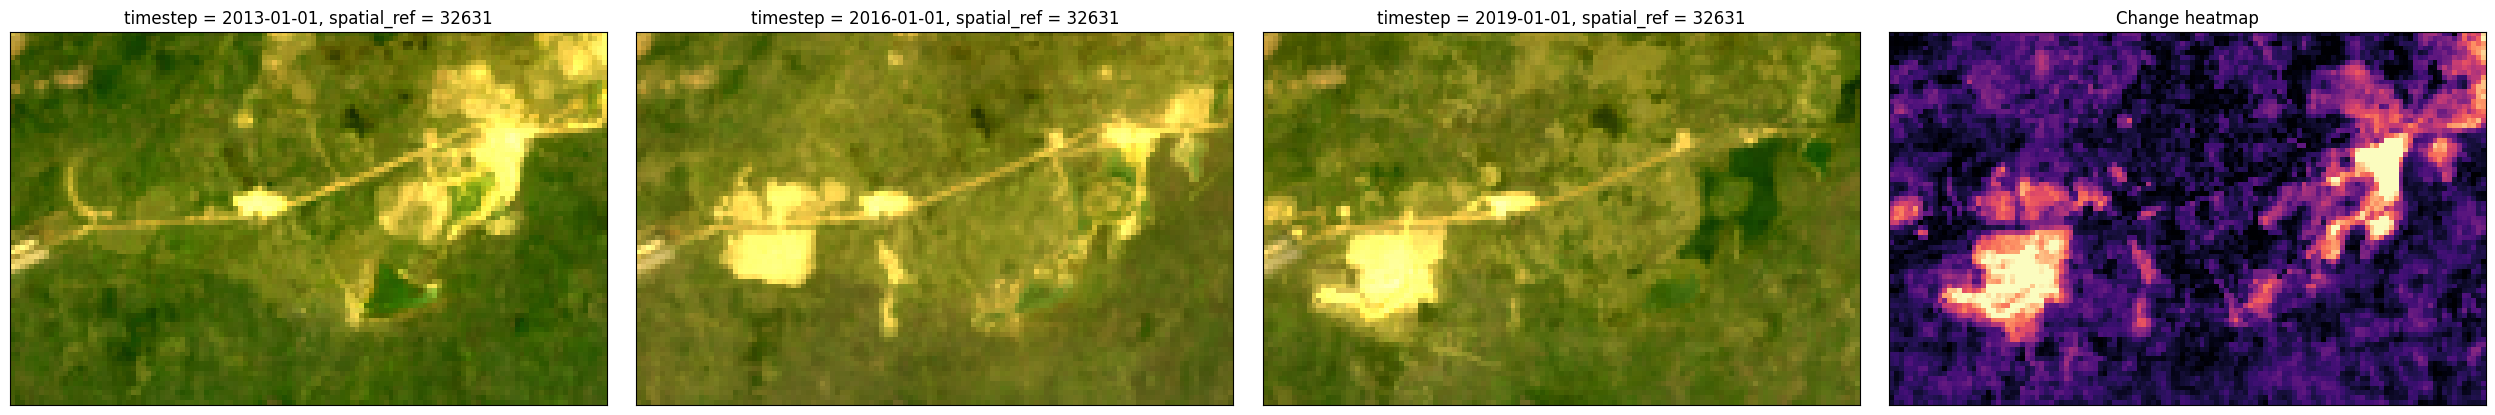

In [3]:
output_data = run_filmstrip_app(output_name,
                                time_range,
                                time_step,
                                tide_range,
                                resolution,
                                max_cloud,
                                ls7_slc_off)

## Using filmstrip plots to identify change

The filmstrip plot above contains several colour imagery panels that summarise the median or 'typical' appearance of the landscape for the time periods defined using `time_range` and `time_step`. 
If you ran the analysis over the West African Cemement Company plant, inspect each of the imagery plots. 
You should be able to see the expansion of the plant over time.

### Change heatmap

To make it easier to identify areas that have changed between each filmstrip panel, the final panel provides a "change heatmap".
This highlights pixels whose values vary greatly between the panels in the filmstrip plot. 
Bright colours indicate pixels that have changed; dark colours indicate pixels that have remained relatively similar across time.

Compare the "change heatmap" panel against the colour imagery panels. 
You should be able to see the expansion clearly in bright pixels and the central plant buildings in the darkest pixels.

> **Technical info:** The "change heatmap" is calculated by first taking a log transform of the imagery data to emphasize dark pixels, then calculating standard deviation across all of the filmstrip panels to reveal pixels that changed over time.

## Downloading filmstrip plot
The high resolution version of the filmstrip plot generated above will be saved to the same location you are running this notebook from (e.g. typically `Real_world_examples`). 
In JupyterLab, use the file browser to locate the image file with a name in the following format: 

`filmstrip_{output_name}_{date_string}_{time_step}.png`

You can download the image to your PC by right clicking on the image file and selecting `Download`.

## Export GeoTIFF data
It can be useful to export each of the filmstrip panels generated above as GeoTIFF raster files so that they can be loaded into a Geographic Information System (GIS) software for further analysis.
Because the filmstrip panels were generated using the "geomedian" statistic that preserves relationships between spectral bands, the resulting data can be validly analysed in the same way as we would analyse an individual satellite image.

To export the GeoTIFFs, run the following cell then right click on the files in the JupyterLab file browser and select `Download`.

In [4]:
for i, ds in output_data.groupby('timestep'):
    print(f'Exporting {i} data')
    write_cog(ds.squeeze(dim="timestep").to_array(), 
              fname=f'geotiff_{output_name}_{i}.tif',
              overwrite=True)

Exporting 2013-01-01 data
Exporting 2016-01-01 data
Exporting 2019-01-01 data


## Next steps
When you are done, return to the [Analysis parameters](#Analysis-parameters) section, modify some values and rerun the analysis. 
For example, you could try:

* Modify `time_range` to look at a specific time period of interest.
* Setting a shorter `time_step` (e.g. `time_step = {'years': 5}`) for a more detailed look at how the landscape has changed over shorter time periods.
* Move to a different area of interest.


---

## Additional information

<b> License </b> The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0).

Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

<b> Contact </b> If you need assistance, please post a question on the [DE Africa Slack channel](https://digitalearthafrica.slack.com/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).

If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

<b> Compatible datacube version </b>

In [5]:
print(datacube.__version__)

1.8.20


**Last Tested:**

In [6]:
from datetime import datetime
datetime.today().strftime('%Y-%m-%d')

'2025-01-16'